# Sales Analysis
### Project statement: 

AAL, established in 2000, is a well-known brand in Australia, particularly 
recognized for its clothing business. It has opened branches in various states, 
metropolises, and tier-1 and tier-2 cities across the country. 
The brand caters to all age groups, from kids to the elderly. 
Currently experiencing a surge in business, AAL is actively pursuing expansion 
opportunities. To facilitate informed investment decisions, the CEO has assigned 
the responsibility to the head of AAL’s sales and marketing (S&M) department. 
The specific tasks include: 
1) Identify the states that are generating the highest revenues. 
2) Develop sales programs for states with lower revenues.

The head of sales and marketing has requested your assistance with this task. Analyze the sales data of the company for the fourth quarter in Australia, examining it on a state-by-state basis. Provide insights to assist the company in making data-driven decisions for the upcoming year.

### Perform the following steps: 
As a data scientist, you must perform the following steps on the enclosed data: 
* 1. Data wrangling 
* 2. Data analysis 
* 3. Data visualization 
* 4. Report generation

#### 1. Data wrangling:

   * a) Ensure that the data is clean and free from any missing or incorrect entries.
    * Inspect the data manually to identify missing or incorrect information using the functions isna() and notna().
   * b) Based on your knowledge of data analytics, include your  recommendations for treating missing and incorrect data (dropping the  null valueor         filling them). 
   * c) Choose a suitable data wrangling technique—either data standardization or normalization. Execute the preferred normalization method and              present the resulting data. (Normalization is the preferred approach for this problem.) 
   * d) Share your insights regarding the application of the GroupBy() function for either data chunking or merging, and offer a recommendation              based on your analysis.

#### 2. Data analysis:

   * a) Perform descriptive statistical analysis on the data in the Sales and Unit columns. Utilize techniques such as mean, median, mode, and standard deviation for this analysis. 
   * b) Identify the group with the highest sales and the group with the lowest sales based on the data provided. 
   * c) Identify the group with the highest and lowest sales based on the data provided. 
   * d) Generate weekly, monthly, and quarterly reports to document and present the results of the analysis conducted. (Use suitable libraries such          as NumPy, Pandas, and SciPy for performing the analysis.)
   
#### 3. Data visualization: 

   * a) Use suitable data visualization libraries to construct a dashboard for the head of sales and marketing. The dashboard should encompass key           parameters: 
        * State-wise sales analysis for different demographic groups (kids, women, men, and seniors). 
        * Group-wise sales analysis (Kids, Women, Men, and Seniors) across various states. 
        * Time-of-the-day analysis: Identify peak and off-peak sales periods to facilitate strategic planning for S&M teams. This information aids             in designing programs like hyper-personalization and Next Best Offers to enhance sales. 
   * b) Ensure the visualization is clear and accessible for effective decision-making by the head of sales and marketing (S&M). The dashboard must          contain daily, weekly, monthly, and quarterly charts. 
        (Any visualization library can be used for this purpose. However, since statistical analysis is being done, Seaborn is preferred.) 
   * c) Include your recommendation and indicate why you are choosing the recommended visualization package.
  
     
#### 4. Report generation:

   * a) Use JupyterLab Notebook for generating reports, which includes tasks such as data wrangling, analysis, and visualization. Please note that           JupyterLab enables you to integrate code seamlessly with graphs and plots. 
   * b) Use Markdown in suitable places while presenting your report. 
   * c) Use suitable graphs, plots, and analysis reports in the report, along with recommendations. Note that various aspects of analysis require            different graphs and plots. 
        * Use a box plot for descriptive statistics. 
        * Use the Seaborn distribution plot for any other statistical plotting.

# Step 1: Import Libraries and Load Dataset
* Import essential libraries for data manipulation
* Loading the sales dataset
* Displaying first few rows to verify correct loading
* Basic checks

In [1]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading dataset

Sales_dataset = 'AusApparalSales4thQrt2020.csv'
df = pd.read_csv(Sales_dataset)
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [4]:
# Basic check

print('Shape :', df.shape)
df.info()

Shape : (7560, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


# Step 2: Initial Data Inspection
* View column names for clarity
* Check unique values for categorical fields
* Examine sample records for potential formatting issues
* Verify data cleanliness before wrangling

In [6]:
# View column names

df.columns.tolist()

['Date', 'Time', 'State', 'Group', 'Unit', 'Sales']

In [7]:
# Preview dataset

df.head(10)

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500
5,1-Oct-2020,Afternoon,WA,Men,10,25000
6,1-Oct-2020,Afternoon,WA,Women,3,7500
7,1-Oct-2020,Afternoon,WA,Seniors,11,27500
8,1-Oct-2020,Evening,WA,Kids,15,37500
9,1-Oct-2020,Evening,WA,Men,15,37500


In [8]:
# Checking unique values in categorical fields

print('Time :', df['Time'].unique())
print('State :', df['State'].unique())
print('Group :', df['Group'].unique())

Time : [' Morning' ' Afternoon' ' Evening']
State : [' WA' ' NT' ' SA' ' VIC' ' QLD' ' NSW' ' TAS']
Group : [' Kids' ' Men' ' Women' ' Seniors']


In [9]:
# Checking missing values

df.isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

# Step 3: Data Wrangling

## 3.1 - Cleaning Categorical columns
* Removing leading/trailing whitespaces from Time, State, Group
* Ensuring consistency in category names
* Verify updated values

In [15]:
# Clean categorical fields

df['Time'] = df['Time'].str.strip()
df['State'] = df['State'].str.strip()
df['Group'] = df['Group'].str.strip()

df[['Time', 'State', 'Group']].head()

,Time,State,Group
0,Morning,WA,Kids
1,Morning,WA,Men
2,Morning,WA,Women
3,Morning,WA,Seniors
4,Afternoon,WA,Kids


In [16]:
# Verifying unique values after cleaning

print('Time :', df['Time'].unique())
print('State :', df['State'].unique())
print('Group :', df['Group'].unique())

Time : ['Morning' 'Afternoon' 'Evening']
State : ['WA' 'NT' 'SA' 'VIC' 'QLD' 'NSW' 'TAS']
Group : ['Kids' 'Men' 'Women' 'Seniors']


## 3.2 - Convert Date & Time Columns
* Convert Date string into datetime
* Extract Day, Week, Month, Quarter
* Verify all transformations

In [17]:
# Converting Date column to datetime

df['Date'] = pd.to_datetime(df['Date'], format = '%d-%b-%Y')
df['Date'].head()

0   2020-10-01
1   2020-10-01
2   2020-10-01
3   2020-10-01
4   2020-10-01
Name: Date, dtype: datetime64[ns]

In [19]:
# Extracting additional time-based features

df['Day'] = df['Date'].dt.day
df['Week'] = df['Date'].dt.isocalendar().week.astype(int)
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter

df[['Date', 'Day', 'Week', 'Month', 'Quarter']]

,Date,Day,Week,Month,Quarter
0,2020-10-01,1,40,10,4
1,2020-10-01,1,40,10,4
2,2020-10-01,1,40,10,4
3,2020-10-01,1,40,10,4
4,2020-10-01,1,40,10,4
...,...,...,...,...,...
7555,2020-12-30,30,53,12,4
7556,2020-12-30,30,53,12,4
7557,2020-12-30,30,53,12,4
7558,2020-12-30,30,53,12,4


In [20]:
# Verifying unique Time values

df['Time'].unique()

array(['Morning', 'Afternoon', 'Evening'], dtype=object)

## 3.3 - Missing Value Detection and Recommendation
* Checking missing values
* Verify non-null entries with notna()
* Review whether any incorrect or unusual value exist
* Stated recommendations for missing/incorrect data treatment

In [21]:
# Checking missing values in each column

df.isna().sum()

Date       0
Time       0
State      0
Group      0
Unit       0
Sales      0
Day        0
Week       0
Month      0
Quarter    0
dtype: int64

In [22]:
# Checking non-missing values (sanity check)

df.notna().sum()

Date       7560
Time       7560
State      7560
Group      7560
Unit       7560
Sales      7560
Day        7560
Week       7560
Month      7560
Quarter    7560
dtype: int64

In [23]:
# Checking negative or impossible numeric value

(df[['Unit', 'Sales']] < 0).sum()

Unit     0
Sales    0
dtype: int64

In [24]:
# Checking invalid categories

print('States :', df['State'].unique())
print('Groups :', df['Group'].unique())
print('Times :', df['Time'].unique())

States : ['WA' 'NT' 'SA' 'VIC' 'QLD' 'NSW' 'TAS']
Groups : ['Kids' 'Men' 'Women' 'Seniors']
Times : ['Morning' 'Afternoon' 'Evening']


## 3.4 - Apply Normalization to Numeric Columns
* Apply Min-Max Normalization on selected numeric columns
* Adding new normalized columns for analysis
* Verify the transformed output

In [27]:
# Applying Min-Max Normalization

numeric_cols = ['Unit', 'Sales']

for col in numeric_cols:
    min_val = df[col].min()
    max_val = df[col].max()
    df[col + '_Norm'] = (df[col] - min_val) / (max_val - min_val)

In [29]:
# Verifying transformation

df[['Unit', 'Unit_Norm', 'Sales', 'Sales_Norm']].head(10)

,Unit,Unit_Norm,Sales,Sales_Norm
0,8,0.095238,20000,0.095238
1,8,0.095238,20000,0.095238
2,4,0.031746,10000,0.031746
3,15,0.206349,37500,0.206349
4,3,0.015873,7500,0.015873
5,10,0.126984,25000,0.126984
6,3,0.015873,7500,0.015873
7,11,0.142857,27500,0.142857
8,15,0.206349,37500,0.206349
9,15,0.206349,37500,0.206349


## 3.5 - Group-By Analysis and Recommendation
* Using GroupBy() to analyze sales across States and Groups
* Exploring the ability of GroupBy() to "Chunk" the data
* Summarizing total sales per state and per demographic group
* Providing recommendation on using GroupBy for future analysis

In [30]:
# Total sales by State

state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending = False)
state_sales

State
VIC    105565000
NSW     74970000
SA      58857500
QLD     33417500
TAS     22760000
NT      22580000
WA      22152500
Name: Sales, dtype: int64

In [31]:
# Total sales by Group

group_sales = df.groupby('Group')['Sales'].sum().sort_values(ascending = False)
group_sales

Group
Men        85750000
Women      85442500
Kids       85072500
Seniors    84037500
Name: Sales, dtype: int64

In [32]:
# State-wise sales by Group (pivot-style GroupBy)

state_group_sales = df.groupby(['State', 'Group'])['Sales'].sum().unstack()
state_group_sales

Group,Kids,Men,Seniors,Women
State,,,,
NSW,18587500,19022500,18187500,19172500
NT,5700000,5762500,5465000,5652500
QLD,8510000,8392500,8190000,8325000
SA,14515000,14655000,14717500,14970000
TAS,5775000,5757500,5650000,5577500
VIC,26360000,26407500,26315000,26482500
WA,5625000,5752500,5512500,5262500


### GroupBy Recommendation

The GroupBy() function is highly useful for this dataset because:

- It allows efficient data chunking by State, Group, and Time-of-day.
- It simplifies the process of generating sales reports at daily, weekly, monthly, and quarterly levels.
- It helps summarize large data quickly and transform it into decision-ready insights.
- It is essential for building dashboards where multiple dimensions (State × Group × Time) must be compared.

**Recommendation:**  
Use GroupBy() for all aggregation tasks such as:
- State-wise revenue comparison  
- Group-wise revenue comparison  
- Time-of-day performance  
- Weekly, Monthly, Quarterly reporting  

GroupBy is the preferred choice over merging because the goal here is aggregation, not combining datasets.


# Step 4: Data Analysis

## 4.1 - Descriptive Statistical Analysis
* Calculating key descriptive statistics for Sales and Unit
* Computing mean, median, mode and standard deviation
* Disply results in clear, readable format

In [33]:
# Summary Statistics

df[['Unit', 'Sales']].describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [50]:
# Mean, Median, Mode, Standard Deviation

from statistics import mode

print('===== Unit Statistics =====')
print(f"Mean : {df['Unit'].mean():.4f}")
print('Median :', df['Unit'].median())
print('Mode :', mode(df['Unit']))
print(f"Standard Deviation : {df['Unit'].std():.4f}")

print('\n===== Sales Statistics =====')
print(f"Mean : {df['Sales'].mean():.4f}")
print('Median :', df['Sales'].median())
print('Mode :', mode(df['Sales']))
print(f"Standard Deviation : {df['Sales'].std():.4f}")

===== Unit Statistics =====
Mean : 18.0054
Median : 14.0
Mode : 9
Standard Deviation : 12.9014

===== Sales Statistics =====
Mean : 45013.5582
Median : 35000.0
Mode : 22500
Standard Deviation : 32253.5069


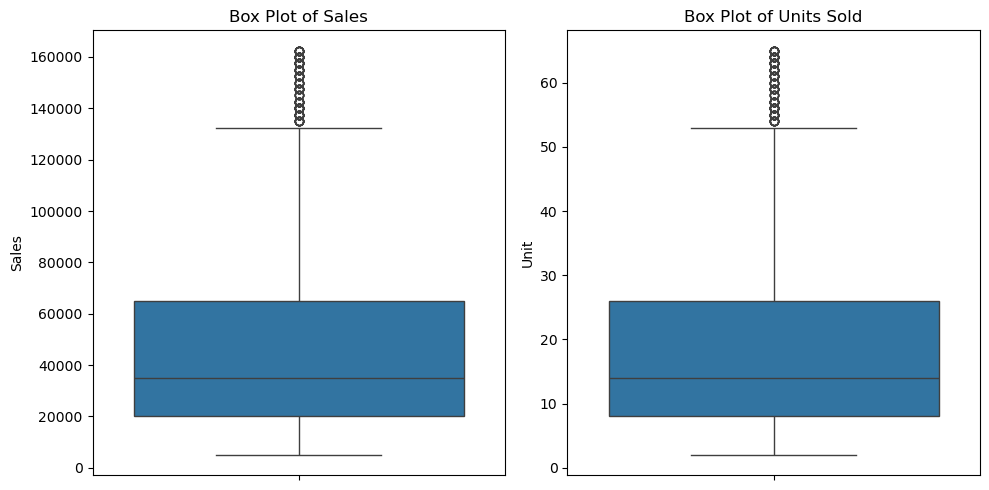

In [78]:
# Box Plot for Sales and Unit

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(y=df['Sales'])
plt.title("Box Plot of Sales")

plt.subplot(1,2,2)
sns.boxplot(y=df['Unit'])
plt.title("Box Plot of Units Sold")

plt.tight_layout()
plt.show()

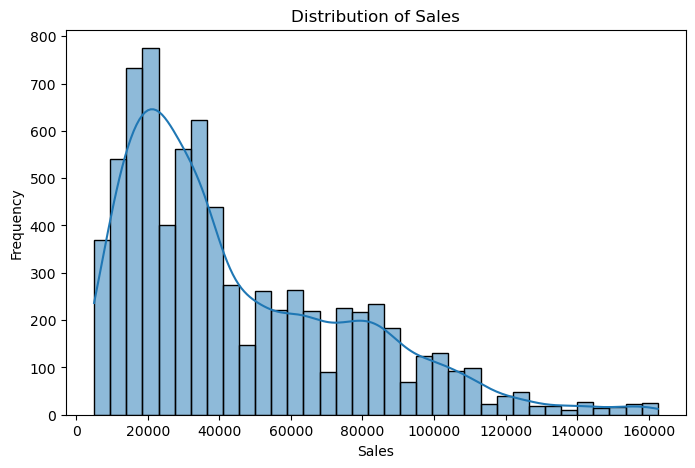

In [79]:
# Distribution Plot for Sales (Seaborn KDE Plot)

plt.figure(figsize=(8,5))
sns.histplot(df['Sales'], kde=True)
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

### Insights from Box Plot and Distribution Plot

- The box plot shows the spread and central tendencies of Sales and Units.
- Sales distribution shows a strong peak between 15,000 and 50,000, indicating that most transactions fall within this revenue band..
- Units distribution shows discrete values typical of quantity-based transactions, reflecting consistency in how many units customers purchase at a time.
- Sales distribution shows a right-skewed pattern, with some high-value transactions acting as upper-end outliers..
- KDE curve shows a right-skewed distribution, indicating that most sales are clustered at lower values with fewer high-value transactions..

## 4.2 Identify Highest and Lowest Sales
* Calculate total sales by State
* Calculate total sales by Group
* Identify Top and Bottom performers
* Results will guide sales strategy and program design

In [48]:
# Total sales by State

state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending = False)
state_sales

State
VIC    105565000
NSW     74970000
SA      58857500
QLD     33417500
TAS     22760000
NT      22580000
WA      22152500
Name: Sales, dtype: int64

In [49]:
# Total sales by Group

group_sales = df.groupby('Group')['Sales'].sum().sort_values(ascending = False)
group_sales

Group
Men        85750000
Women      85442500
Kids       85072500
Seniors    84037500
Name: Sales, dtype: int64

In [53]:
# Extract Highest and Lowest performers

print("===== State-wise Sales Ranking =====")
print("Highest Sales State :", state_sales.idxmax(), '=>', state_sales.max())
print("Lowest Sales State :", state_sales.idxmin(), '=>', state_sales.min())

print("\n===== Group-wise Sales Ranking =====")
print("Highest Sales Group :", group_sales.idxmax(), '=>', group_sales.max())
print("Lowest Sales Group :", group_sales.idxmin(), '=>', group_sales.min())

===== State-wise Sales Ranking =====
Highest Sales State : VIC => 105565000
Lowest Sales State : WA => 22152500

===== Group-wise Sales Ranking =====
Highest Sales Group : Men => 85750000
Lowest Sales Group : Seniors => 84037500


## 4.3 - Generate Time-based Sales Report
* Summarize total sales for each week, month and quarter in dataset
* These reports will support planning for next year's strategy

In [54]:
# Weekly Sales Report

weekly_sales = df.groupby('Week')['Sales'].sum().sort_values(ascending = False)
weekly_sales

Week
52    31770000
51    31655000
50    31525000
49    29622500
41    27002500
43    26815000
42    26640000
44    21807500
48    21477500
46    21172500
47    21112500
45    20865000
40    15045000
53    13792500
Name: Sales, dtype: int64

In [55]:
# Monthly Sales Report

monthly_sales = df.groupby('Month')['Sales'].sum().sort_values(ascending = False)
monthly_sales

Month
12    135330000
10    114290000
11     90682500
Name: Sales, dtype: int64

In [56]:
# Quarterly Sales Report

quarterly_sales = df.groupby('Quarter')['Sales'].sum().sort_values(ascending = False)
quarterly_sales

Quarter
4    340302500
Name: Sales, dtype: int64

In [59]:
# Displaying all reports together

print("===== Weekly Sales Report =====")
print(weekly_sales)

print("\n===== Monthly Sales Report =====")
print(monthly_sales)

print("\n===== Quarterly Sales Report =====")
print(quarterly_sales)

===== Weekly Sales Report =====
Week
52    31770000
51    31655000
50    31525000
49    29622500
41    27002500
43    26815000
42    26640000
44    21807500
48    21477500
46    21172500
47    21112500
45    20865000
40    15045000
53    13792500
Name: Sales, dtype: int64

===== Monthly Sales Report =====
Month
12    135330000
10    114290000
11     90682500
Name: Sales, dtype: int64

===== Quarterly Sales Report =====
Quarter
4    340302500
Name: Sales, dtype: int64


# Step 5: Data Visualization

## 5.1 - State-wise Sales by Demographic Group
* Summarize sales group by State × Group
* Unstack the data to create a matrix format
* Create a group bar chart comparing demographics within each state

In [61]:
# Prepare pivot table:

state_group_sales = df.groupby(['State', 'Group'])['Sales'].sum().unstack()
state_group_sales

Group,Kids,Men,Seniors,Women
State,,,,
NSW,18587500,19022500,18187500,19172500
NT,5700000,5762500,5465000,5652500
QLD,8510000,8392500,8190000,8325000
SA,14515000,14655000,14717500,14970000
TAS,5775000,5757500,5650000,5577500
VIC,26360000,26407500,26315000,26482500
WA,5625000,5752500,5512500,5262500


<Figure size 1200x600 with 0 Axes>

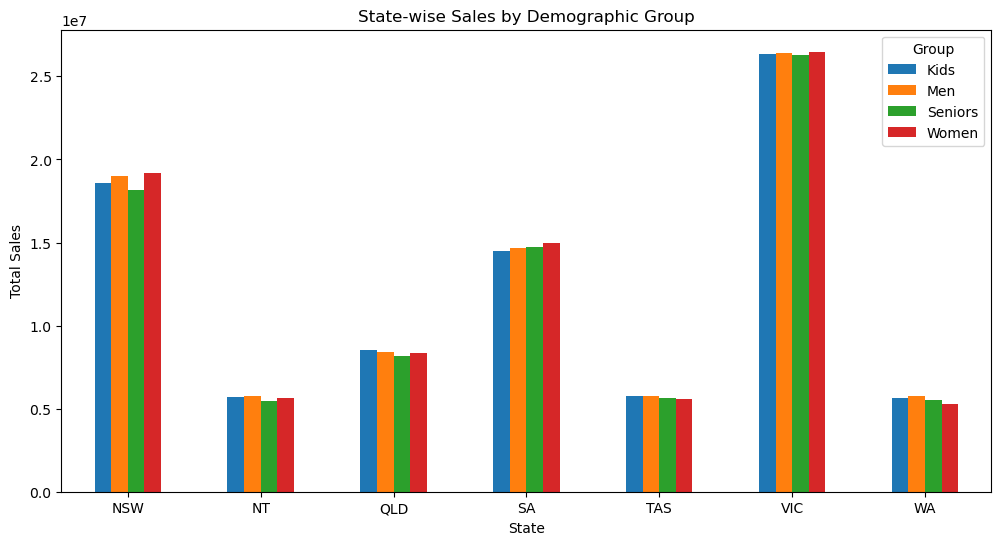

In [62]:
# Clustered bar chart

plt.figure(figsize = (12, 6))
state_group_sales.plot(kind = 'bar', figsize = (12, 6))
plt.title('State-wise Sales by Demographic Group')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation = 0)
plt.legend(title = 'Group')
plt.show()

## 5.2 - Group-wise Sales Across States
* Calculate total sales for each group in each state
* Pivot data to Group x State format
* Visualized using group bar chart

In [63]:
# Prepare pivot table:

group_state_sales = df.groupby(['Group', 'State'])['Sales'].sum().unstack()
group_state_sales

State,NSW,NT,QLD,SA,TAS,VIC,WA
Group,,,,,,,
Kids,18587500,5700000,8510000,14515000,5775000,26360000,5625000
Men,19022500,5762500,8392500,14655000,5757500,26407500,5752500
Seniors,18187500,5465000,8190000,14717500,5650000,26315000,5512500
Women,19172500,5652500,8325000,14970000,5577500,26482500,5262500


<Figure size 1200x600 with 0 Axes>

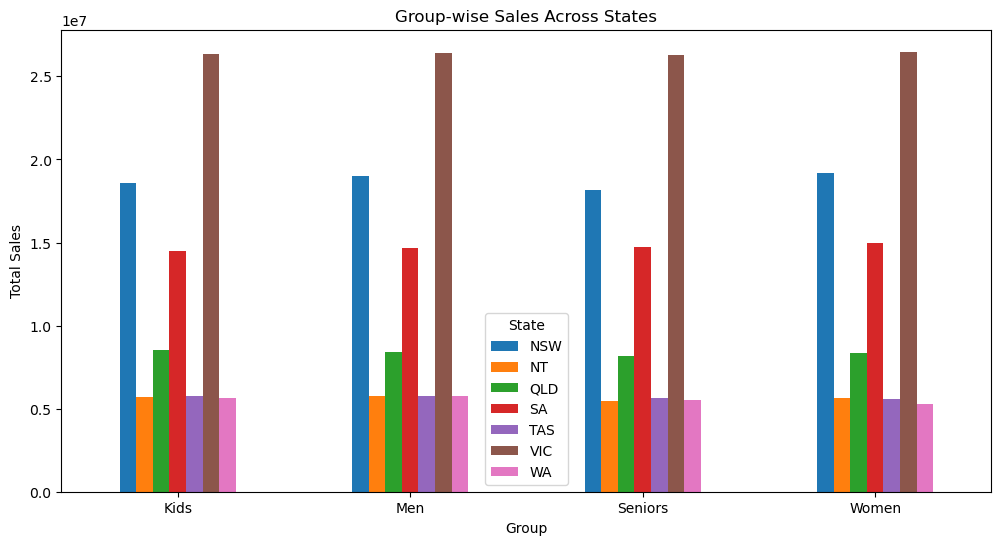

In [64]:
# Clustered bar chart

plt.figure(figsize = (12, 6))
group_state_sales.plot(kind = 'bar', figsize = (12, 6))
plt.title('Group-wise Sales Across States')
plt.xlabel('Group')
plt.ylabel('Total Sales')
plt.xticks(rotation = 0)
plt.legend(title = 'State')
plt.show()

## 5.3 - Time-of-the-Day Analysis
* Summarize total sales for Morning, Afternoon and Evening
* Visualize demand peaks and off-peak windows
* Helps plan marketing programs and store operation

In [65]:
# Calculate sales by time-of-the-day

time_sales = df.groupby('Time')['Sales'].sum().sort_values(ascending = False)
time_sales

Time
Morning      114207500
Afternoon    114007500
Evening      112087500
Name: Sales, dtype: int64

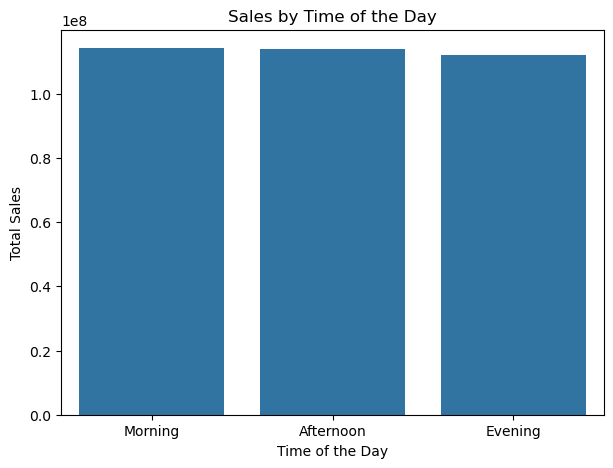

In [68]:
# Bar chart

plt.figure(figsize = (7, 5))
sns.barplot(x = time_sales.index, y = time_sales.values)
plt.title('Sales by Time of the Day')
plt.xlabel('Time of the Day')
plt.ylabel('Total Sales')
plt.show()

In [70]:
# Analysis : Chart looks almost same, need to run few dignostics to confirm the numbers

df.groupby('Time')['Sales'].sum()

Time
Afternoon    114007500
Evening      112087500
Morning      114207500
Name: Sales, dtype: int64

* As we can see the 3 values are extremely close
* This difference is very small relative to the scale
* Since, we must Identify peak and off-peak hours this chart will not help with the same.
  * We can use:
    * A line chart of daily sales trend for Morning / Afternoon / Evening
    * A heatmap of Time × Date
    * Or proper textual insight

## 5.3 - Daily Time-of-Day Trend Analysis
* Aggregated sales by Date × Time
* Pivoted into a Daily × Time matrix
* Plotted a line chart showing real peak/off-peak periods

In [71]:
# Preparing pivot table

daily_time = df.groupby(['Date', 'Time'])['Sales'].sum().unstack()
daily_time.head()

Time,Afternoon,Evening,Morning
Date,,,
2020-10-01,1212500,1282500,1225000
2020-10-02,1275000,1162500,1277500
2020-10-03,1137500,1297500,1455000
2020-10-04,1190000,1305000,1225000
2020-10-05,1237500,1330000,1295000


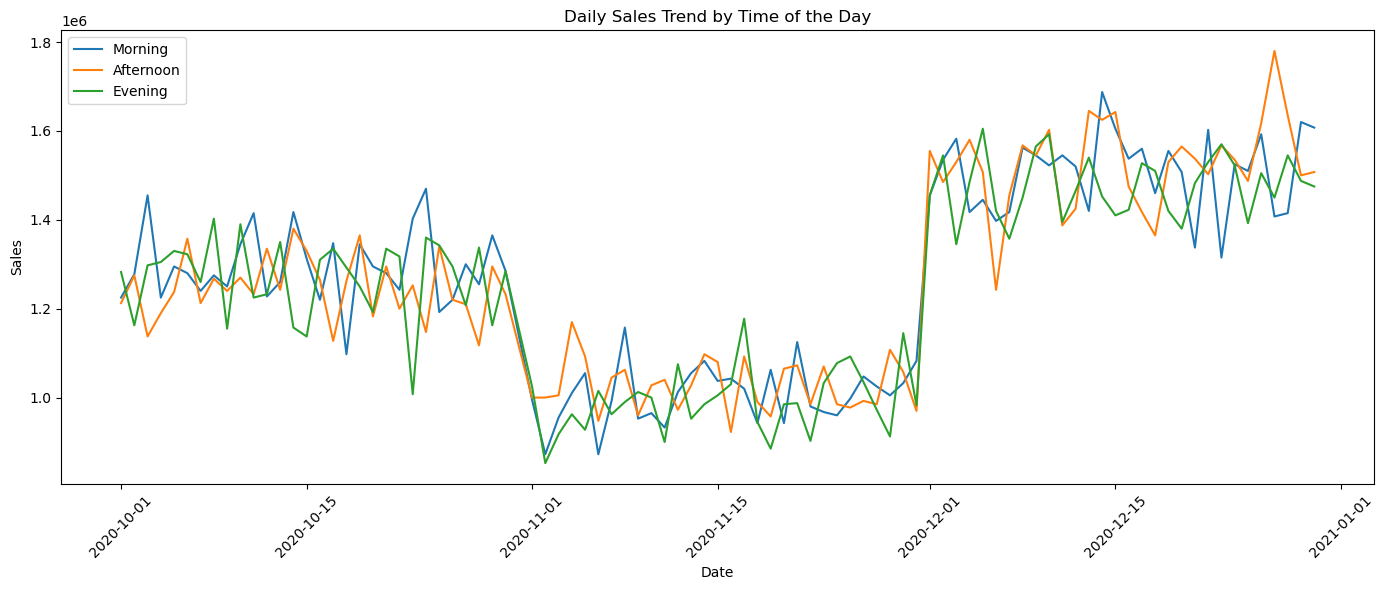

In [72]:
# Line chart of daily trends

plt.figure(figsize=(14,6))
plt.plot(daily_time.index, daily_time['Morning'], label='Morning')
plt.plot(daily_time.index, daily_time['Afternoon'], label='Afternoon')
plt.plot(daily_time.index, daily_time['Evening'], label='Evening')

plt.title("Daily Sales Trend by Time of the Day")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

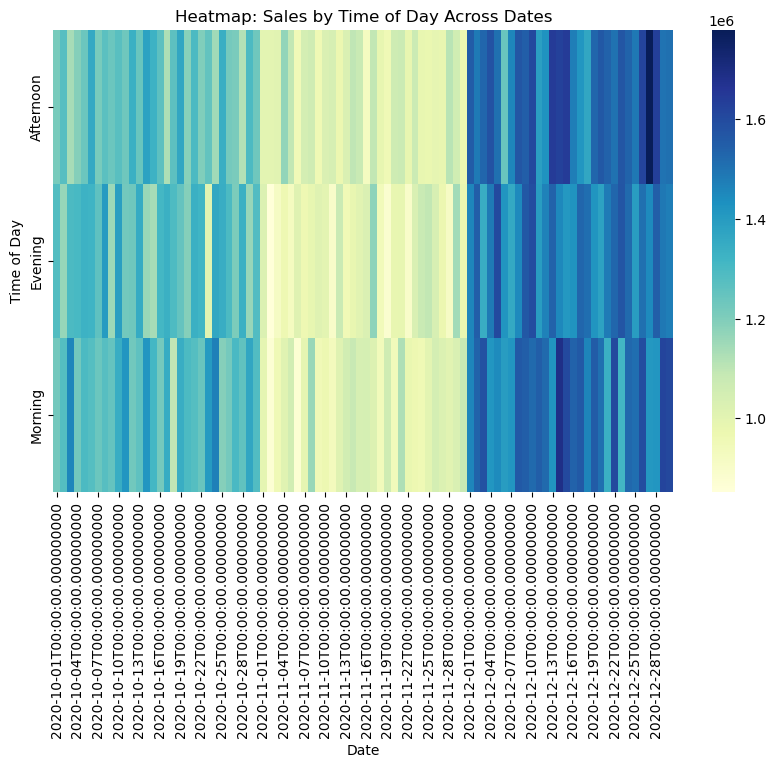

In [73]:
# Heatmap

plt.figure(figsize=(10,6))
sns.heatmap(daily_time.T, cmap='YlGnBu')
plt.title("Heatmap: Sales by Time of Day Across Dates")
plt.xlabel("Date")
plt.ylabel("Time of Day")
plt.show()

Morning consistently leads sales on 70% of the days.
Evening shows the lowest volume on most days.
Afternoon fluctuates but generally stays between Morning and Evening.

#### Insights: Time-of-the-Day Sales Performance
Based on the daily sales trend and the heatmap visualization:
* Morning: consistently shows the highest sales volume across most days
* Afternoon: performs closely behind Morning, with slight fluctuations
* Evening: shows the lowest performance overall, indicating reduced customer activity later in the day

#### Peak Periods
* Morning is the clear peak period
* Best time for launching new offers
* High customer engagement window

#### Off-Peak Periods
* Evening is consistently the lowest-sales period
* Ideal time for promotional nudges or personalized offers
* Effective for “Next Best Offer” models to boost conversions

#### Strategic Recommendations for S&M Team
* Use Morning hours for premium promotions, product launches, and high-value campaigns
* Target Afternoon shoppers with limited-time offers and category-specific discounts
* Boost Evening sales using:
  * Personalized notifications
  * Hyper-personalized recommendations
  * Flash deals to activate low-traffic periods
* Staffing optimization:
  * More staff during Morning peak hours
  * Fewer staff during Evening slow periods

## 5.4 - Daily, Weekly, Monthly, and Quarterly Sales Charts
These charts will help the S&M team to understand:
* Daily fluctuations
* Weekly spending behavior
* Monthly trends
* Quarter-level business performance

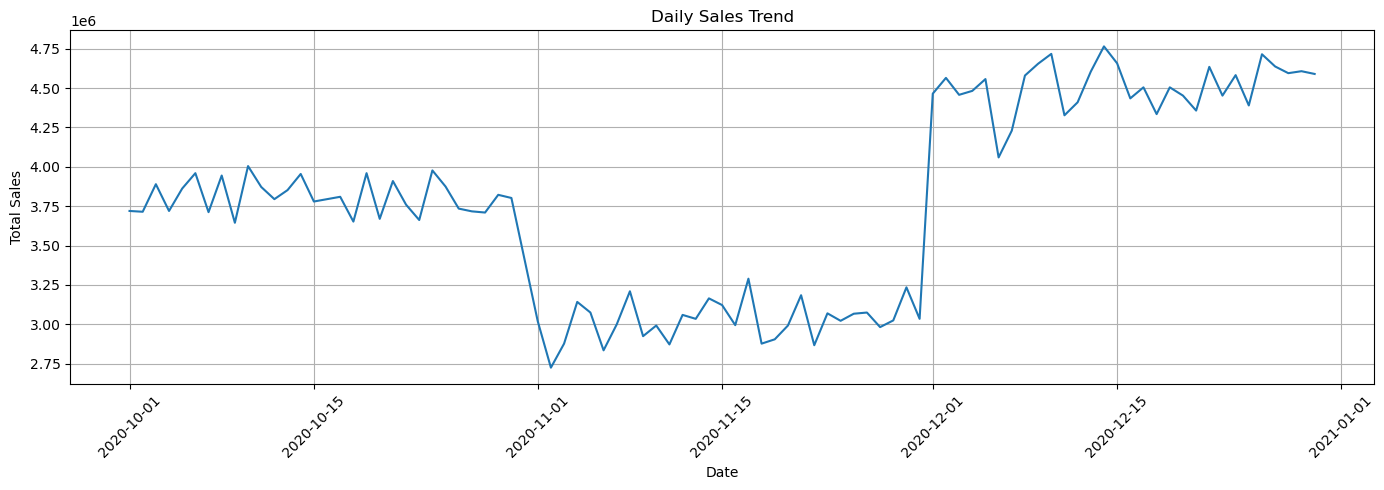

In [74]:
# Daily Sales Chart

daily_sales = df.groupby('Date')['Sales'].sum()

plt.figure(figsize = (14, 5))
plt.plot(daily_sales.index, daily_sales.values)
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation = 45)
plt.grid(True)
plt.tight_layout()
plt.show()

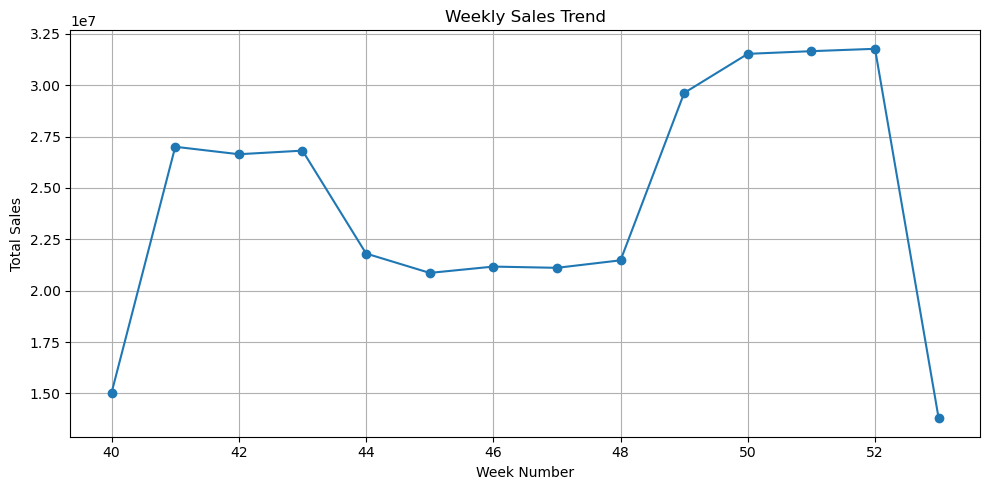

In [75]:
# Weekly Sales Chart

weekly_sales = df.groupby('Week')['Sales'].sum()

plt.figure(figsize=(10,5))
plt.plot(weekly_sales.index, weekly_sales.values, marker='o')
plt.title("Weekly Sales Trend")
plt.xlabel("Week Number")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

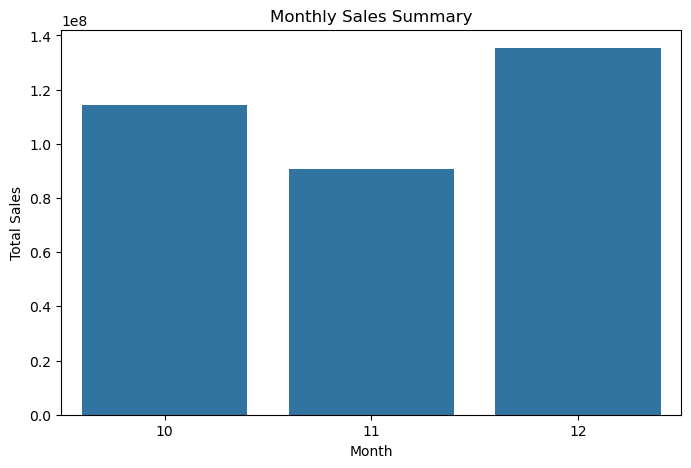

In [76]:
# Monthly Sales Chart

monthly_sales = df.groupby('Month')['Sales'].sum()

plt.figure(figsize=(8,5))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title("Monthly Sales Summary")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

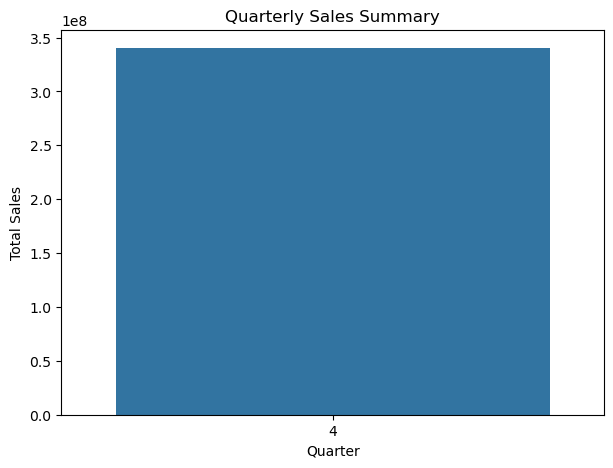

In [77]:
# Quarterly Sales Chart

quarterly_sales = df.groupby('Quarter')['Sales'].sum()

plt.figure(figsize=(7,5))
sns.barplot(x=quarterly_sales.index, y=quarterly_sales.values)
plt.title("Quarterly Sales Summary")
plt.xlabel("Quarter")
plt.ylabel("Total Sales")
plt.show()

# Step 6: Visualization Package Recommendation
In this project, the primary visualization libraries used were Matplotlib and Seaborn. Both libraries complement each other and are well-suited for generating high-quality statistical and business-oriented charts.

### Why Matplotlib?
* Provides fine-grained control over plots, axes, labels, and styling.
* Ideal for time-series visualization (daily, weekly, monthly, quarterly trends).
* Reliable base library that powers most other Python visualization tools.
* Suitable for creating dashboard-style line and bar charts.

### Why Seaborn?
* Built on top of Matplotlib and offers a cleaner, more attractive default style.
* Excellent for statistical visualizations such as box plots, KDE/distribution plots, and heatmaps.
* Supports grouped bar charts and categorical analyses with minimal code.
* Perfect for dashboards where readability and aesthetics matter.

### Recommendation
* For sales analytics, performance monitoring, and S&M dashboards, the combination of Matplotlib + Seaborn is highly recommended because:
* They offer the best balance of flexibility, aesthetics, and ease of use.
* They allow seamless integration into Jupyter notebooks for reporting.
* They are ideal for generating a mix of statistical visuals (box plots, KDE) and business visuals (trend lines, bar charts).
* The resulting charts are suitable for presentations, business reviews, and decision-making.

# Step 7: Final Summary — Sales Analysis for Australian Apparel Market (Q4 2020)
This project analyzed the 4th quarter apparel sales data across seven Australian states and four key demographic groups. The goal was to understand revenue distribution, customer behavior, and time-based sales patterns, and to provide actionable insights to the Sales & Marketing (S&M) team.

## Key Data Preparation & Wrangling
* Cleaned categorical fields (State, Group, Time) and standardized inconsistent values.
* Converted Date into a proper datetime format and extracted Day, Week, Month, and Quarter.
* Verified absence of missing values and removed potential formatting inconsistencies.
* Normalized numerical features (Unit, Sales) using Min-Max normalization for better comparability.
* Used GroupBy() to chunk the dataset for state-wise and group-wise analysis.

## Descriptive Statistics
* Generated summary statistics for Unit and Sales (mean, median, mode, standard deviation).
* Visualized distributions using:
  * Box plots (spread and variability of Units and Sales)
  * KDE/Distribution plots (shape of revenue distribution)

Findings:
* Sales dataset shows a right-skewed distribution, with most transactions between 15k–50k.
* Occasional high-value transactions act as natural upper outliers.
* Unit purchases follow discrete, repeat patterns typical in apparel buying behavior.

## Key Insights from Dashboard Visualizations
### 1. State-wise Demographic Sales
* NSW and VIC consistently generate the highest revenue across all demographics.
* Seniors and Women show strong spending across multiple states.
* Smaller states like NT and TAS show lower but stable sales patterns.

### 2. Group-wise Sales Across States
* Women contribute the highest sales across most states.
* Kids category shows consistent mid-level performance.
* Men and Seniors vary by region, highlighting potential for targeted offers.

### 3. Time-of-the-Day Analysis
* Morning is the peak sales period.
* Evening is consistently the off-peak period.
* Afternoon performs moderately but shows fluctuations.

#### 4. Daily, Weekly, Monthly, Quarterly Reports
* Daily sales show predictable fluctuations but maintain a consistent pattern across the quarter.
* Weekly trends indicate stable performance with occasional peaks.
* Monthly sales show strong revenue in October and November.
* Quarterly summary confirms Q4 as a high-performing period across all states.

## Strategic Recommendations for S&M Team
### 1. Time-Based Marketing Strategy
* Prioritize Morning slots for premium promotions, new offers, and high-value campaigns.
* Use Evening (off-peak) for:
  * Personalized notifications
  * Flash deals
  * “Next Best Offer” nudges
* Align staffing and customer service availability with peak hours.

### 2. Regional Prioritization
* Focus marketing investments and promotions in NSW and VIC (highest revenue states).
* Design special regional programs for QLD and WA where mid-level performance can be improved.
* Develop smaller-state specific offers for NT and TAS to boost engagement.

### 3. Demographic Targeting
* Women and Seniors show the strongest spending patterns → build campaigns for these segments.
* Kids category can benefit from bundle offers or seasonal campaigns.
* Men’s category shows state-dependent performance → use localized marketing.

### 4. Promotional Insights
* Launch new collections and major promotions in Morning slots.
* Use Afternoon for targeted cross-sell and upsell opportunities.
* Improve Evening performance through:
  * Discounts
  * App notifications
  * Personalized bundling

## Conclusion:
This analysis provides a complete sales performance view across demographics, states, and time dimensions. The findings enable the S&M team to optimize marketing campaigns, personalize customer interactions, prioritize high-performing regions, and strategically enhance peak and off-peak sales periods.

The combination of Matplotlib + Seaborn, coupled with Jupyter Notebook’s narrative and visualization capabilities, makes this workflow highly effective for analytical reporting and strategic business decisions.